#### K Means Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("D:\EverythingDS\DataSets\Mall_Customers_clustering.csv")

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
from sklearn.pipeline import Pipeline
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
prep_pipe = Pipeline([
    # Encoding
    ('OneHotEncoder', OneHotCategoricalEncoder(variables = ['Genre'],
                                               top_categories = None,
                                               drop_last = True))
    ])  

In [10]:
prep_pipe.fit(data)
df = prep_pipe.transform(data)

In [11]:
# Excluding CustomerID
X = df.iloc[:,1:].values

Text(0, 0.5, 'WCSS')

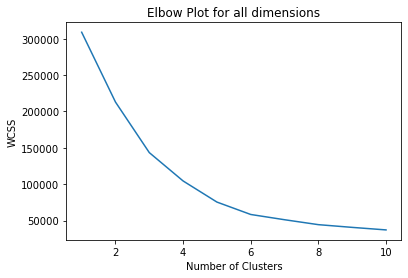

In [12]:
# Elbow method for all dimensions
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow Plot for all dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [13]:
# Chooing k = 6 since after this point the drop in ecss is relatively less
kmeans_all = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
ykmeans_all = kmeans_all.fit_predict(X)

In [14]:
print(ykmeans_all)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 5 0 1 3 5 5 5 3 5 5 3 3 3 3 3 5 3 3 5 3 3 3 5 3 3 5 5 3 3 3 3
 3 5 3 5 5 3 3 5 3 3 5 3 3 5 5 3 3 5 3 5 5 5 3 5 3 5 5 3 3 5 3 5 3 3 3 3 3
 5 5 5 5 5 3 3 3 3 5 5 5 4 5 4 2 4 2 4 2 4 5 4 2 4 2 4 2 4 2 4 5 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


In [15]:
# Using 2 dimensions to visualize the how clusters are grouped along with their centroids

In [16]:
# For visualizing we select only the columns Annual Income and Spending Score
X1 = data.iloc[:,[3,4]].values

Text(0, 0.5, 'WCSS')

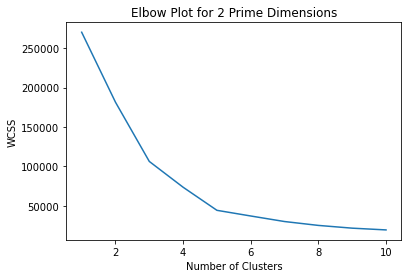

In [17]:
# Elbow method for 2 prime dimension
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow Plot for 2 Prime Dimensions")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [18]:
# Here we are choosing the number of cluster to be 5 since we have a clear elbow and minimal drop in wcss after
kmeans_2d = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
ykmeans_2d = kmeans_2d.fit_predict(X1)
print(ykmeans_2d)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


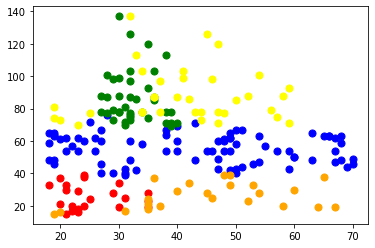

In [20]:
# Several scatterplots for each cluster
plt.scatter(X[ykmeans_2d == 0, 0], X[ykmeans_2d == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[ykmeans_2d == 1, 0], X[ykmeans_2d == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[ykmeans_2d == 2, 0], X[ykmeans_2d == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[ykmeans_2d == 3, 0], X[ykmeans_2d == 3, 1], s = 50, c = 'orange', label = 'Cluster 4')
plt.scatter(X[ykmeans_2d == 4, 0], X[ykmeans_2d == 4, 1], s = 50, c = 'yellow', label = 'Cluster 5')